# KNN - In this notebook we will predict digits

In [1]:
# imports
import numpy as np
from sklearn import datasets
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

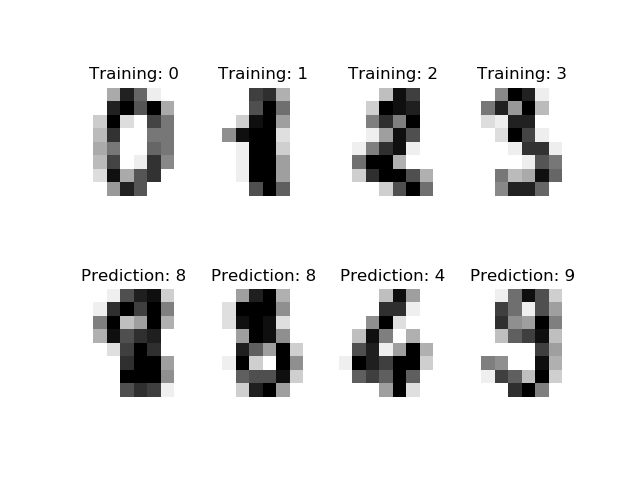

In [6]:
# Load images
from IPython.display import Image
Image('imagens/digitos.png')

In [7]:
# Load dataset
dig = datasets.load_digits()
dig

{'data': array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ..., 10.,  0.,  0.],
        [ 0.,  0.,  0., ..., 16.,  9.,  0.],
        ...,
        [ 0.,  0.,  1., ...,  6.,  0.,  0.],
        [ 0.,  0.,  2., ..., 12.,  0.,  0.],
        [ 0.,  0., 10., ..., 12.,  1.,  0.]]),
 'target': array([0, 1, 2, ..., 8, 9, 8]),
 'target_names': array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 'images': array([[[ 0.,  0.,  5., ...,  1.,  0.,  0.],
         [ 0.,  0., 13., ..., 15.,  5.,  0.],
         [ 0.,  3., 15., ..., 11.,  8.,  0.],
         ...,
         [ 0.,  4., 11., ..., 12.,  7.,  0.],
         [ 0.,  2., 14., ..., 12.,  0.,  0.],
         [ 0.,  0.,  6., ...,  0.,  0.,  0.]],
 
        [[ 0.,  0.,  0., ...,  5.,  0.,  0.],
         [ 0.,  0.,  0., ...,  9.,  0.,  0.],
         [ 0.,  0.,  3., ...,  6.,  0.,  0.],
         ...,
         [ 0.,  0.,  1., ...,  6.,  0.,  0.],
         [ 0.,  0.,  1., ...,  6.,  0.,  0.],
         [ 0.,  0.,  0., ..., 10.,  0.,  0.]],
 
        [[ 0

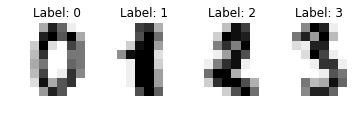

In [13]:
# Show some images
image_labels = list(zip(dig.images, dig.target))

for index, (image, label) in enumerate(image_labels[:4]):
    plt.subplot(2, 4, index + 1)
    plt.axis('off')
    plt.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    plt.title('Label: %i' % label)

In [15]:
# Generate X, Y
X = dig.data
Y = dig.target
print(X.shape, Y.shape)

(1797, 64) (1797,)


In [16]:
# Train/Test the data
X_train, testData, Y_train, testLabels = train_test_split(X, Y, test_size = 30)

In [23]:
# Division data between train, test and validation
trainData, validData, trainLabels, validLabels = train_test_split(X_train, Y_train, test_size = 0.1)

In [24]:
# print
print("Train: {}".format(len(trainLabels)))
print("Validation: {}".format(len(validLabels)))
print("Test: {}".format(len(testLabels)))

Train: 1590
Validation: 177
Test: 30


In [25]:
# Normalizate the average data
X_norm = np.mean(X, axis=0) # calculate the dataset average

X_train_norm = trainData - X_norm
X_valid_norm = validData - X_norm
X_test_norm = testData - X_norm

In [26]:
# print the shape
print(X_train_norm.shape, X_valid_norm.shape, X_test_norm.shape)

(1590, 64) (177, 64) (30, 64)


# Finding the best k value

In [27]:
# Range of k values
kVals = range(1, 30, 2) # getting a even value

In [28]:
# List to receive the values
acuracy = []

In [33]:
# Loop the k values to get the best one
for k in kVals:
    # Train the model with each k value
    modelKNN = KNeighborsClassifier(n_neighbors=k)
    modelKNN.fit(trainData, trainLabels)
    
    score = modelKNN.score(validData, validLabels)
    print("With k value = %d the acuracy is %.2f%%" % (k, score * 100))
    acuracy.append(score)

With k value = 1 the acuracy is 97.18%
With k value = 3 the acuracy is 97.18%
With k value = 5 the acuracy is 97.74%
With k value = 7 the acuracy is 98.31%
With k value = 9 the acuracy is 97.74%
With k value = 11 the acuracy is 97.18%
With k value = 13 the acuracy is 96.61%
With k value = 15 the acuracy is 97.74%
With k value = 17 the acuracy is 97.18%
With k value = 19 the acuracy is 97.74%
With k value = 21 the acuracy is 97.18%
With k value = 23 the acuracy is 96.61%
With k value = 25 the acuracy is 96.61%
With k value = 27 the acuracy is 96.61%
With k value = 29 the acuracy is 96.61%


In [38]:
# Get the best k value
i =np.argmax(acuracy)

print("THe k value = %d have the best acuracy with %.2f%% in validation data" % (kVals[i], acuracy[i] * 100))

THe k value = 7 have the best acuracy with 98.31% in validation data


# Training the Model

In [48]:
# Creating the final model
model = KNeighborsClassifier(n_neighbors = i)

In [49]:
# Trainig
model.fit(trainData, trainLabels)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=3, p=2,
           weights='uniform')

In [50]:
# Predict the test_data
predictions = modelKNN.predict(testData)

In [53]:
# print performance
print('Evaluation of the model test')
print(classification_report(testLabels, predictions))

Evaluation of the model test
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           2       1.00      1.00      1.00         3
           3       1.00      1.00      1.00         1
           4       1.00      1.00      1.00         8
           5       1.00      1.00      1.00         6
           6       1.00      1.00      1.00         5
           7       1.00      1.00      1.00         2
           9       1.00      1.00      1.00         4

   micro avg       1.00      1.00      1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



In [54]:
# Confusion Matrix
print("Confusion Matrix")
print(confusion_matrix(testLabels, predictions))

Confusion Matrix
[[1 0 0 0 0 0 0 0]
 [0 3 0 0 0 0 0 0]
 [0 0 1 0 0 0 0 0]
 [0 0 0 8 0 0 0 0]
 [0 0 0 0 6 0 0 0]
 [0 0 0 0 0 5 0 0]
 [0 0 0 0 0 0 2 0]
 [0 0 0 0 0 0 0 4]]


Problaby this digit is 2


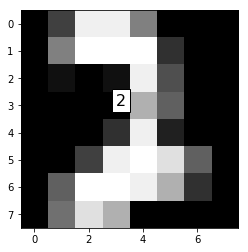

Problaby this digit is 5


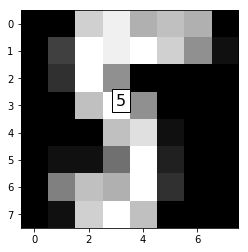

Problaby this digit is 6


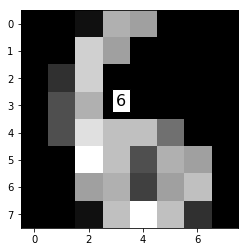

Problaby this digit is 2


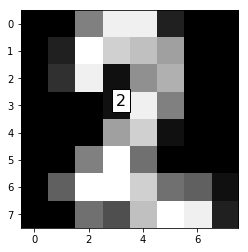

Problaby this digit is 2


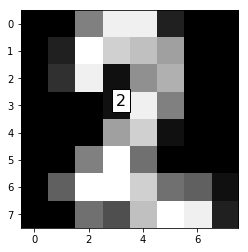

In [58]:
# Predict with train_model using test_data
for i in np.random.randint(0, high=len(testLabels), size=(5,)):
    
    # Getting an image and make the predict
    image =testData[i]
    prediction = model.predict([image])[0]
    
    #show predictions
    imgdata = np.array(image, dtype='float')
    pixels = imgdata.reshape((8,8))
    plt.imshow(pixels, cmap='gray')
    plt.annotate(prediction,(3,3),bbox={'facecolor':'white'}, fontsize=16)
    print("Problaby this digit is {}".format(prediction))
    plt.show()

# That's all folks

# Thanks DSA Academy